In [1]:
import os 
import PIL
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from skimage import io
import tensorflow as tf

2025-10-09 19:35:31.085504: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset_path = "/Users/chloelsmith/Downloads/practicum_project/Alpha-/archive-2/Training"

# Create dataset
training_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels="inferred",       # infer labels from subfolder names
    label_mode="categorical",        
    image_size=(224, 224),   # resize all images
    batch_size=32,           # number of images per batch
    shuffle=True,            # shuffle data
    seed=42                  # for reproducibility
)

# Check class names
print("Classes found:", training_dataset.class_names)

Found 5712 files belonging to 4 classes.
Classes found: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [3]:
testing_dataset = tf.keras.utils.image_dataset_from_directory(
    "/Users/chloelsmith/Downloads/practicum_project/Alpha-/archive-2/Testing",
    labels="inferred",       # infer labels from subfolder names
    label_mode="categorical",        # can also use "categorical" or "binary"
    image_size=(224, 224),   # resize all images
    batch_size=32,           # number of images per batch
    shuffle=True,            # shuffle data
    seed=42                  # for reproducibility
)   
# Check class names
print("Classes found:", testing_dataset.class_names)

Found 1311 files belonging to 4 classes.
Classes found: ['glioma', 'meningioma', 'notumor', 'pituitary']


Label: [0. 0. 1. 0.]


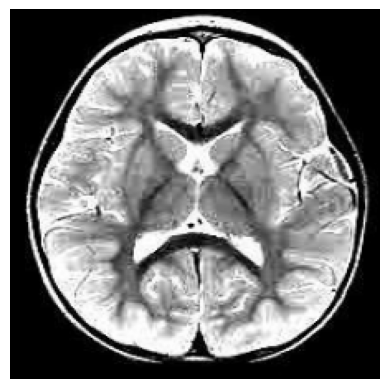

2025-10-09 19:36:00.414500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:
# Take one batch
for images, labels in training_dataset.take(1):
    img = images[0].numpy().astype("uint8")  # first image in batch
    label = labels[0].numpy()
    print("Label:", label)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [5]:
class_names = training_dataset.class_names
counts = Counter()

for images, labels in training_dataset:
    # labels shape: (batch_size, num_classes) for categorical
    # Convert to class index
    class_indices = tf.argmax(labels, axis=1).numpy()  # shape (batch_size,)
    for idx in class_indices:
        counts[class_names[idx]] += 1

# Print counts
for cls in class_names:
    print(f"{cls}: {counts[cls]} images")



glioma: 1321 images
meningioma: 1339 images
notumor: 1595 images
pituitary: 1457 images


2025-10-09 19:36:06.527330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
counts = Counter()

for images, labels in testing_dataset:
    # labels shape: (batch_size, num_classes) for categorical
    # Convert to class index
    class_indices = tf.argmax(labels, axis=1).numpy()  # shape (batch_size,)
    for idx in class_indices:
        counts[class_names[idx]] += 1

# Print counts
for cls in class_names:
    print(f"{cls}: {counts[cls]} images")

glioma: 300 images
meningioma: 306 images
notumor: 405 images
pituitary: 300 images


2025-10-09 19:36:08.896753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Label: [1. 0. 0. 0.]


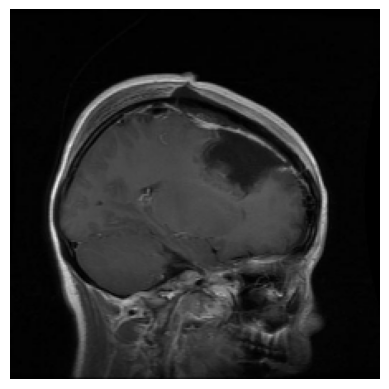

2025-10-09 19:36:10.827765: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
# Take one batch
for images, labels in testing_dataset.take(1):
    img = images[0].numpy().astype("uint8")  # first image in batch
    label = labels[0].numpy()
    print("Label:", label)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [8]:
print(class_names)

def to_binary(images, labels):
    # Convert one-hot to integer index
    label_idx = tf.argmax(labels, axis=1)
    
    # 0 = notumor, 1 = tumor
    # Here, 'notumor' is index 2
    new_labels = tf.where(label_idx == 2, 0, 1)
    
    # new_labels shape: (batch_size,)
    return images, new_labels

binary_train_dataset = training_dataset.map(to_binary)


['glioma', 'meningioma', 'notumor', 'pituitary']


Label: 1


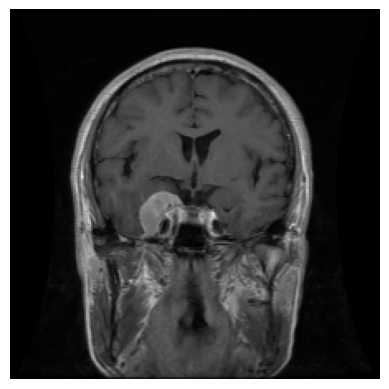

2025-10-09 19:36:17.589002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
# Take one batch
for images, labels in binary_train_dataset.take(1):
    img = images[0].numpy().astype("uint8")  # first image in batch
    label = labels[0].numpy()
    print("Label:", label)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [10]:
binary_test_dataset = testing_dataset.map(to_binary)

Label: 1


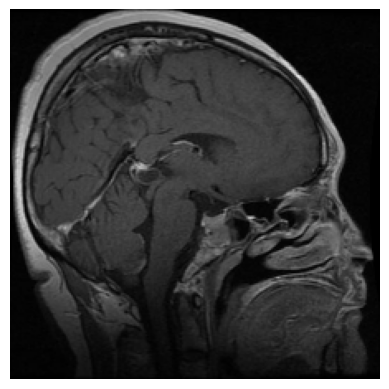

2025-10-09 19:36:21.717266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
# Take one batch
for images, labels in binary_test_dataset.take(1):
    img = images[0].numpy().astype("uint8")  # first image in batch
    label = labels[0].numpy()
    print("Label:", label)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [74]:
binary_dataset = binary_test_dataset.concatenate(binary_train_dataset)

In [80]:
from collections import Counter

class_names = ['notumor', 'tumor']
counts = Counter()

for images, labels in binary_dataset:  # <- use train_binary or your dataset
    labels_np = labels.numpy()        # shape (batch_size,)
    for lbl in labels_np:
        counts[class_names[lbl]] += 1

# Print counts
for cls in class_names:
    print(f"{cls}: {counts[cls]} images")

2025-10-09 20:19:15.785097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


notumor: 2000 images
tumor: 5023 images


In [81]:
binary_dataset = binary_dataset.unbatch()


In [82]:
# Count total number of samples
dataset_size = 0
for _ in binary_dataset:  # your unbatched dataset
    dataset_size += 1

print("Total samples:", dataset_size)


Total samples: 7023


2025-10-09 20:25:11.810067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [85]:
train_size = int(0.7 * dataset_size)
val_size   = int(0.15 * dataset_size)
test_size  = dataset_size - train_size - val_size
# Shuffle first for randomness
binary_dataset = binary_dataset.shuffle(buffer_size=dataset_size, seed=42)

train_ds = binary_dataset.take(train_size)
temp_ds  = binary_dataset.skip(train_size)

val_ds   = temp_ds.take(val_size)
test_ds  = temp_ds.skip(val_size)

batch_size = 32

train_dataset = train_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset   = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset  = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)


Label: 1


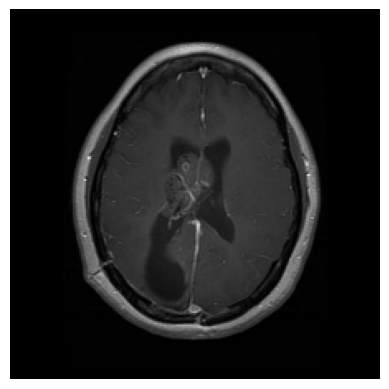

2025-10-09 20:27:00.423717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [88]:
# Take one batch
for images, labels in train_dataset.take(1):
    img = images[0].numpy().astype("uint8")  # first image in batch
    label = labels[0].numpy()
    print("Label:", label)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Label: 1


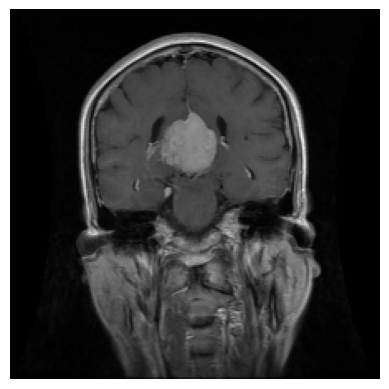

2025-10-09 20:27:13.423832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [89]:
# Take one batch
for images, labels in test_dataset.take(1):
    img = images[0].numpy().astype("uint8")  # first image in batch
    label = labels[0].numpy()
    print("Label:", label)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [90]:
from collections import Counter

class_names = ['notumor', 'tumor']
counts = Counter()

for images, labels in train_dataset:  # <- use train_binary or your dataset
    labels_np = labels.numpy()        # shape (batch_size,)
    for lbl in labels_np:
        counts[class_names[lbl]] += 1

# Print counts
for cls in class_names:
    print(f"{cls}: {counts[cls]} images")


notumor: 1400 images
tumor: 3516 images


2025-10-09 20:27:26.831440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [91]:
counts = Counter()

for images, labels in test_dataset:
    labels_np = labels.numpy()        # shape (batch_size,)
    for lbl in labels_np:
        counts[class_names[lbl]] += 1

# Print counts
for cls in class_names:
    print(f"{cls}: {counts[cls]} images")

notumor: 289 images
tumor: 765 images


2025-10-09 20:27:38.937503: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [92]:
counts = Counter()

for images, labels in val_dataset:
    labels_np = labels.numpy()        # shape (batch_size,)
    for lbl in labels_np:
        counts[class_names[lbl]] += 1

# Print counts
for cls in class_names:
    print(f"{cls}: {counts[cls]} images")

notumor: 304 images
tumor: 749 images


2025-10-09 20:27:49.854867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
